In [2]:
import pandas as pd
import numpy as np

In [3]:
df1 = pd.read_csv('/Users/aeriliu/Documents/Columbia/Spring2021/IEOR4511/schwab_figi.csv')

In [4]:
df1.head()

,Unnamed: 0,custodianType,tickerSymbol,cusip,isin,optexp,maturity,closeprice,WTType,type1,type2
0,0,EQTY,ALRM,011642105,US0116421050,NaN,NaN,92.04,CSUS,Common Stock,Common Stock
1,4,EQTY,BIG,089302103,US0893021032,NaN,NaN,66.54,CSUS,Common Stock,Common Stock
2,7,EQTY,ENPH,29355A107,US29355A1079,NaN,NaN,165.34,CSUS,Common Stock,Common Stock
3,10,EQTY,FCX,35671D857,US35671D8570,NaN,NaN,37.47,CSUS,Common Stock,Common Stock
4,17,EQTY,HIBB,428567101,US4285671016,NaN,NaN,64.99,CSUS,Common Stock,Common Stock


In [5]:
df1.columns

Index(['Unnamed: 0', 'custodianType', 'tickerSymbol', 'cusip', 'isin',
       'optexp', 'maturity', 'closeprice', 'WTType', 'type1', 'type2'],
      dtype='object')

In [6]:
more_features = ['has_cusip', 'has_sedol', 'has_isin', 'has_insSecurity_Id',
                 'has_instId', 'has_ProxySecurityId', 'has_tickerSymbol',
                 'isCashEquivalent', 'Type', 'ClosePrice', 'has_ClosePrice']

In [7]:
def extract_predicate_info(dataframe):
    features = ['has_ClosePrice', 'has_MaturityDate', 'has_OptionExpDate']
    corresponding_cols = ['closeprice', 'maturity', 'optexp']
    
    for i in range(len(features)):
        dataframe[features[i]] = dataframe[corresponding_cols[i]].isna()
    return 

In [8]:
extract_predicate_info(df1)

In [9]:
df1.head()

,Unnamed: 0,custodianType,tickerSymbol,cusip,isin,optexp,maturity,closeprice,WTType,type1,type2,has_ClosePrice,has_MaturityDate,has_OptionExpDate
0,0,EQTY,ALRM,011642105,US0116421050,NaN,NaN,92.04,CSUS,Common Stock,Common Stock,False,True,True
1,4,EQTY,BIG,089302103,US0893021032,NaN,NaN,66.54,CSUS,Common Stock,Common Stock,False,True,True
2,7,EQTY,ENPH,29355A107,US29355A1079,NaN,NaN,165.34,CSUS,Common Stock,Common Stock,False,True,True
3,10,EQTY,FCX,35671D857,US35671D8570,NaN,NaN,37.47,CSUS,Common Stock,Common Stock,False,True,True
4,17,EQTY,HIBB,428567101,US4285671016,NaN,NaN,64.99,CSUS,Common Stock,Common Stock,False,True,True


In [10]:
final = df1[['custodianType','type1','type2','has_MaturityDate', 'has_OptionExpDate','has_ClosePrice','WTType']]
final.head()

,custodianType,type1,type2,has_MaturityDate,has_OptionExpDate,has_ClosePrice,WTType
0,EQTY,Common Stock,Common Stock,True,True,False,CSUS
1,EQTY,Common Stock,Common Stock,True,True,False,CSUS
2,EQTY,Common Stock,Common Stock,True,True,False,CSUS
3,EQTY,Common Stock,Common Stock,True,True,False,CSUS
4,EQTY,Common Stock,Common Stock,True,True,False,CSUS


In [11]:
missing = final['type1'].isna()
final.loc[missing, ['type1']] = 'NA'

missing = final['type2'].isna()
final.loc[missing, ['type2']] = 'NA'

missing = final['WTType'].isna()
final.loc[missing, ['WTType']] = 'NA'

missing = final['custodianType'].isna()
final.loc[missing, ['custodianType']] = 'NA'

/Users/aeriliu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [13]:
final.to_pickle("/Users/aeriliu/Documents/Columbia/Spring2021/IEOR4511/023_lgb_prepared.pkl")

# Model

In [12]:
final = pd.read_pickle("/Users/aeriliu/Documents/Columbia/Spring2021/IEOR4511/023_lgb_prepared.pkl")

In [13]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, log_loss, precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [15]:
final.tail()

,custodianType,type1,type2,has_MaturityDate,has_OptionExpDate,has_ClosePrice,WTType
10304,DEBT,FIXED,Muni,False,True,False,MBUS
10305,DEBT,FIXED,Muni,False,True,False,MBUS
10306,DEBT,FIXED,Muni,False,True,False,MBUS
10307,DEBT,FIXED,Muni,False,True,False,MBUS
10308,DEBT,US DOMESTIC,Corp,False,True,False,CDUS


In [18]:
final.loc[:,"WTType"] = final["WTType"].str[:2]

In [1]:
final.tail()

NameError: name 'final' is not defined

In [21]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing it
final['type1'] = labelencoder.fit_transform(final['type1'])

labelencoder = LabelEncoder()
final['type2'] = labelencoder.fit_transform(final['type2'])

labelencoder = LabelEncoder()
final['custodianType'] = labelencoder.fit_transform(final['custodianType'])

label_encode = LabelEncoder()
final['WTType'] = label_encode.fit_transform(final['WTType'])

In [22]:
final.head()

,custodianType,type1,type2,has_MaturityDate,has_OptionExpDate,has_ClosePrice,WTType
0,2,11,5,True,True,False,5
1,2,11,5,True,True,False,5
2,2,11,5,True,True,False,5
3,2,11,5,True,True,False,5
4,2,11,5,True,True,False,5


In [23]:
final['WTType'].unique()

array([ 5,  0,  6, 10,  9, 16, 14, 11,  1,  4,  2,  8,  7, 13, 15, 12, 17,
        3, 18])

In [24]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10309 entries, 0 to 10308
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   custodianType      10309 non-null  int64
 1   type1              10309 non-null  int64
 2   type2              10309 non-null  int64
 3   has_MaturityDate   10309 non-null  bool 
 4   has_OptionExpDate  10309 non-null  bool 
 5   has_ClosePrice     10309 non-null  bool 
 6   WTType             10309 non-null  int64
dtypes: bool(3), int64(4)
memory usage: 352.5 KB


In [59]:
xvar=['custodianType','type1','type2','has_MaturityDate','has_OptionExpDate','has_ClosePrice']
yvar=['WTType']
X=final[xvar]
y=final[yvar]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [62]:
train_data = lgb.Dataset(X_train, 
                         label=y_train, 
                         feature_name=['custodianType','type1','type2','has_MaturityDate','has_OptionExpDate','has_ClosePrice'],
                         categorical_feature=['custodianType','type1','type2','has_MaturityDate','has_OptionExpDate','has_ClosePrice'])
validation_data = lgb.Dataset(X_valid,
                              label=y_valid)

In [63]:
params = {'objective': 'multiclass', 
          'num_class': 19,
            'seed': 123,
            'metric': 'multi_logloss',
            'num_leaves': 200,
            'feature_fraction': 0.75,
            'bagging_freq': 10,
            'bagging_fraction': 0.80
            }

model = lgb.train(
    params = params,
    train_set = train_data,
    num_boost_round = 10000,
    valid_sets = [train_data, validation_data],
    early_stopping_rounds = 10,
    verbose_eval = 50
)

# print('log_loss:', log_loss(y_valid, model.predict(X_valid)))

# feature_importance = model.feature_importance()
# feature_importance = pd.DataFrame({'Features': FEATURES, 'Importance': feature_importance}).sort_values('Importance', ascending = False)

/Users/aeriliu/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/aeriliu/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['custodianType', 'has_ClosePrice', 'has_MaturityDate', 'has_OptionExpDate', 'type1', 'type2']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/aeriliu/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/aeriliu/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 7422, number of used features: 5
[LightGBM] [Info] Start training from score -3.410946
[LightGBM] [Info] Start training from score -7.813592
[LightGBM] [Info] Start training from score -2.848419
[LightGBM] [Info] Start training from score -6.204154
[LightGBM] [Info] Start training from score -4.493363
[LightGBM] [Info] Start training from score -1.844032
[LightGBM] [Info] Start training from score -3.317492
[LightGBM] [Info] Start training from score -5.734150
[LightGBM] [Info] Start training from score -3.855958
[LightGBM] [Info] Start training from score -0.551898
[LightGBM] [Info] Start training from score -2.528697
[LightGBM] [Info] Start training from score -7.302766


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [64]:
print('log_loss:', log_loss(y_valid, model.predict(X_valid)))

ValueError: y_true and y_pred contain different number of classes 14, 19. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [ 0  2  3  4  5  6  7  8  9 10 13 14 16 17]

In [65]:
feature_importance = model.feature_importance()

In [67]:
feature_importance

array([130, 367, 360, 873, 273,   0], dtype=int32)

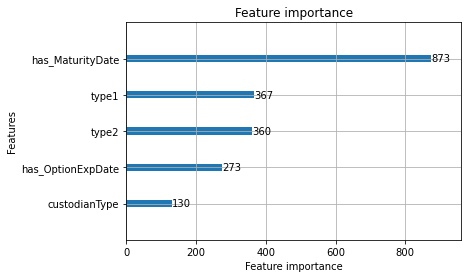

In [66]:
_ = lgb.plot_importance(model)

In [68]:
y_pred = model.predict(X_test)

In [69]:
y_pred_1 = [np.argmax(line) for line in y_pred]

In [70]:
precision_score(y_pred_1,y_test,average=None).mean()

0.7490421455938697

In [71]:
mismatch = (y_test['WTType'] != np.array(y_pred_1))

In [72]:
df1.iloc[X_test[mismatch].index, :]

,Unnamed: 0,custodianType,tickerSymbol,cusip,isin,optexp,maturity,closeprice,WTType,type1,type2,has_ClosePrice,has_MaturityDate,has_OptionExpDate
6496,38792,DERV,IWM 210319P00212000,NaN,NaN,20210319.0,NaN,0.35000,PTUS,NotFound,NotFound,False,True,False
6173,35290,DERV,SPY 210618P00250000,NaN,NaN,20210618.0,NaN,0.98000,PTUS,Common Stock,Common Stock,False,True,False
7616,51999,EQTY,NaN,50183L107,US50183L1070,NaN,NaN,0.00000,ADUS,NotFound,NotFound,False,True,True
8928,60605,DEBT,NaN,36161TVY8,US36161TVY80,NaN,20231108.0,107.97250,CDUS,US DOMESTIC,Corp,False,False,True
510,3079,O,SWTXX,808508105,NaN,NaN,NaN,1.00000,MMUS,Open-End Fund,Mutual Fund,False,True,True
6399,37570,DERV,QQQ 210416P00291000,NaN,NaN,20210416.0,NaN,3.62000,PTUS,Common Stock,Common Stock,False,True,False
8918,60456,DEBT,NaN,912833LP3,US912833LP31,NaN,20231115.0,99.24218,ZTUS,US GOVERNMENT,Bond,False,False,True
10308,83677,DEBT,NaN,14042RMX6,US14042RMX60,NaN,20220815.0,102.69880,CDUS,US DOMESTIC,Corp,False,False,True
8676,57911,DEBT,NaN,38148J3S8,US38148J3S83,NaN,20211209.0,101.73440,CDUS,US DOMESTIC,Corp,False,False,True
9438,70120,DEBT,NaN,370ESCBS3,NaN,NaN,20130715.0,0.00000,OAUS,NotFound,NotFound,False,False,True


In [73]:
result=y_test
result.loc[:,"prediction"]=np.array(y_pred_1)
result["WTType"]=label_encode.inverse_transform(result['WTType'])
result["Prediction"]=label_encode.inverse_transform(result['prediction'])
result.loc[mismatch,]

/Users/aeriliu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/aeriliu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-73-db1185973452>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,WTType,prediction,Prediction
6496,PT,4,CL
6173,PT,4,CL
7616,AD,5,CS
8928,CD,2,CB
510,MM,10,MF
6399,PT,4,CL
8918,ZT,16,TN
10308,CD,2,CB
8676,CD,2,CB
9438,OA,9,MB
